## Research on the Real Estate Market for Apartment Sales
* to determine market value of real estate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("real_estate_data.csv", sep='\t')
pd.set_option('display.max_columns', None)

## dataset overview

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.shape

(23699, 22)

#### renaming columns

In [6]:
data = data.rename(columns={'studio': 'is_studio','open_plan': 'is_open_plan','airports_nearest': 'distance_to_nearest_airport','cityCenters_nearest': 'distance_to_downtown','parks_around3000': 'num_of_parks_around_3000m','parks_nearest': 'distance_to_nearest_park','ponds_around3000': 'num_of_ponds_around_3000m','ponds_nearest': 'distance_to_nearest_pond'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'distance_to_nearest_airport', 'distance_to_downtown',
       'num_of_parks_around_3000m', 'distance_to_nearest_park',
       'num_of_ponds_around_3000m', 'distance_to_nearest_pond',
       'days_exposition'],
      dtype='object')

#### converting datatypes of columns

* first_day_exposition(object) publication date. Requires conversion to DateTime
* floors_total(float64) Requires conversion to int
* is_apartment(object) requires conversion to boolean
* balcony(float64) Requires conversion to int
* num_of_parks_around_3000m(float64) number of parks within a 3 km radius. Requires conversion to int
* num_of_ponds_around_3000m(float64) number of bodies of water within a 3 km radius. Requires conversion to inton to int


In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('Int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('Int64')
data['num_of_parks_around_3000m'] =  data['num_of_parks_around_3000m'].astype('Int64')
data['num_of_ponds_around_3000m'] =  data['num_of_ponds_around_3000m'].astype('Int64')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,distance_to_nearest_airport,distance_to_downtown,num_of_parks_around_3000m,distance_to_nearest_park,num_of_ponds_around_3000m,distance_to_nearest_pond,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,<NA>,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,<NA>,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [8]:
# adding all indexes of rows that will be deleted
idx_to_be_removed = []

## Removing anomalies from dataset

#### deleting total images column

In [9]:
# we dont need total_images
data.drop('total_images',axis=1,inplace=True)

#### removing extremely expensive house from data

In [10]:
# checking last price column for outliers
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [11]:
last_price_anomalies = data['last_price'].loc[(data['last_price']>50000000)].count()
last_price_anomalies_p = np.round(float((last_price_anomalies *100) /len(data)),decimals=1)
print("there are",last_price_anomalies,"houses with abnormal values which is",last_price_anomalies_p,"%")

there are 131 houses with abnormal values which is 0.6 %


In [12]:
#removing house which costs more than 50000000
idx_to_be_removed.extend(data['last_price'].loc[(data['last_price']>50000000)].index)


#### removing very cheap houses from dataset

In [13]:
last_price_small_anomalies = data['last_price'].loc[(data['last_price'] <1000000)].count()
last_price_small_anomalies_p =np.round(float((last_price_small_anomalies *100) /len(data)), decimals =1)
print("there are",last_price_small_anomalies,"houses with abnormal values which is",last_price_small_anomalies_p,"%")

there are 225 houses with abnormal values which is 0.9 %


In [14]:
# removing houses which cost less than 1000000
idx_to_be_removed.extend(data['last_price'].loc[(data['last_price']<1000000)].index)


#### removing outliers from total floors 

In [15]:
data['floors_total'].describe()

count      23613.0
mean     10.673824
std       6.597173
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           60.0
Name: floors_total, dtype: Float64

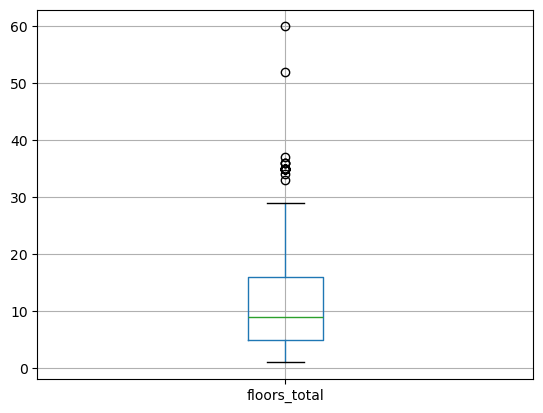

In [16]:
data.loc[:,['floors_total']].boxplot()
plt.show()

In [17]:
floors_total_anomalies =data['floors_total'].loc[(data['floors_total'] >30)].count()
floors_total_anomalies_p = np.round(float((floors_total_anomalies * 100) /len(data)),decimals =1)
print("Total records with extreme number of floors is",floors_total_anomalies,"which is",floors_total_anomalies_p,'%')

Total records with extreme number of floors is 32 which is 0.1 %


In [18]:
# Mark for deletion
idx_to_be_removed.extend(data['floors_total'].loc[(data['floors_total' ] >30)].index)
idx_to_be_removed.extend(data[data['floors_total'].isna()].index)


#### removing outliers from rooms

In [19]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

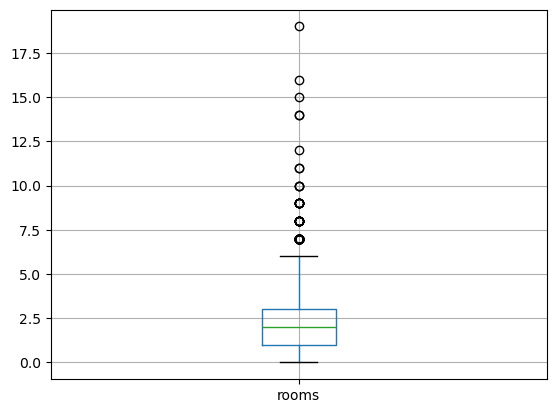

In [20]:
data.loc[:,['rooms']].boxplot()
plt.show()

In [21]:
# records with high number of rooms
rooms_anomalies = data['rooms'].loc[(data['rooms'] >8)].count()
rooms_anomalies_p = np.round(float((rooms_anomalies *100) / len(data)),
decimals =1)
print('total records with high number of rooms is',rooms_anomalies,'which is',rooms_anomalies_p,'%')

total records with high number of rooms is 19 which is 0.1 %


In [22]:
# Mark for deletion
idx_to_be_removed.extend(data['rooms'].loc[(data['rooms'] >8)].index)

In [23]:
# records with zero rooms
zero_rooms_anomalies = data['rooms'].loc[(data['rooms'] == 0)].count()
# mark for deletion
idx_to_be_removed.extend(data['rooms'].loc[(data['rooms'] == 0)].index)

#### removing outliers from total area

In [24]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

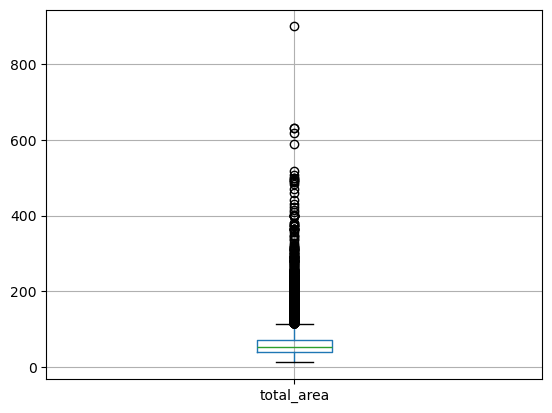

In [25]:
# recommended apartment area is 28-30
data.loc[:,['total_area']].boxplot()
plt.show()

For apartments with a total area of more than 300 square meters, we will set the
decimal separator, since  it was most likely lost when entering

In [26]:
for anomaly in data.loc[(data['total_area'] > 300),'total_area'] :
    data.loc[(data['total_area'] == anomaly) ,'total_area'] = anomaly / 10

deleting rows with less than 20 area

In [27]:
total_area_anomalies = data['total_area'].loc[(data['total_area'] <= 20)].count() 
# Mark for deletion
idx_to_be_removed.extend(data['total_area'].loc[(data['total_area'] <=20)].index)

#### removing outliers from ceiling height

replacing null ceiling height values with median ceiling height of same value in rooms 

In [28]:
median_heights = data.groupby('rooms')['ceiling_height'].median()
data['ceiling_height'] = data.apply(lambda row: median_heights[row['rooms']] if pd.isnull(row['ceiling_height']) else row['ceiling_height'], axis=1)

In [29]:
data['ceiling_height'].describe()

count    23698.000000
mean         2.722539
std          0.989714
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

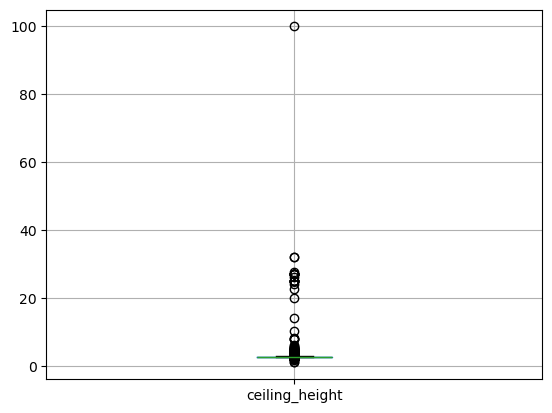

In [30]:
data.loc[:,['ceiling_height']].boxplot()
plt.show()


for ceilings over 20 meters we set the decimal separator

In [31]:
for anomaly in data.loc[(data['ceiling_height'] >= 20),'ceiling_height'] :
    data.loc[(data['ceiling_height'] == anomaly) ,'ceiling_height'] = anomaly /10

deleting houses with ceiling height more than 4.5 and less than 2

In [32]:
idx_to_be_removed.extend(data['ceiling_height'].loc[(data['ceiling_height'] > 4.5)].index)
idx_to_be_removed.extend(data['ceiling_height'].loc[(data['ceiling_height'] <= 2)].index)


#### removing outliers from kitchen area

In [33]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

we replace negetive values with median of same total area

In [34]:
for anomaly in data.loc[(data['kitchen_area'] < 0)].index :     
    data.loc[(data.index == anomaly),'kitchen_area'] = data.loc[(data['total_area']) == data.loc[(data.index == anomaly),'total_area'].iloc[0],'total_area'].median()

when kitchen area is larger than total area we assume misplacement of decimal and add it

In [35]:
for anomaly in data.loc[(data['kitchen_area'] >  data['total_area'])].index :
    data.loc[(data.index == anomaly),'kitchen_area'] = data.loc[(data.index == anomaly),'kitchen_area'].iloc[0] / 10


removing rows wit kitchen area greater than 50

In [36]:
idx_to_be_removed.extend(data.loc[(data['kitchen_area'] >50)].index)

removing entries with kitchen area less than 4

In [37]:
idx_to_be_removed.extend(data.loc[(data['kitchen_area'] <4)].index)

#### removing outliers from living area

In [38]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

when living area exceeedes total area we calculate it as total area-kitchen area

In [39]:
for anomaly in data.loc[(data['living_area'] > data['total_area']) & 
                        (data['kitchen_area'] < data['total_area'])]:
    
    data.loc[(data.index == anomaly),'living_area'] = data.loc[(data.index == anomaly),'total_area'] - data.loc[(data.index == anomaly),'kitchen_area']
  

remove reows with living area less than 5

In [40]:
idx_to_be_removed.extend(data.loc[(data['living_area'] <5)].index)

## Handling missing values

In [41]:
data.isna().sum()

last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                     1
floors_total                      86
living_area                     1903
floor                              0
is_apartment                       0
is_studio                          0
is_open_plan                       0
kitchen_area                    2278
balcony                        11519
locality_name                     49
distance_to_nearest_airport     5542
distance_to_downtown            5519
num_of_parks_around_3000m       5518
distance_to_nearest_park       15620
num_of_ponds_around_3000m       5518
distance_to_nearest_pond       14589
days_exposition                 3181
dtype: int64

#### filling missing values in living and kitchen area

In [42]:
# replacing na with median in living area
k_median_living_area = data['living_area'].median() / data['total_area'].median()
data['living_area'] = data['living_area'].fillna(k_median_living_area*data['total_area'])

In [43]:
# replacing na with with median in kitchen area
k_median_kitchen_area = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(k_median_kitchen_area*data['total_area'])

#### filling missing values in balcony column

na means there is no balcony. we replace na with 0

In [44]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].describe()

count     23699.0
mean      0.59108
std      0.959298
min           0.0
25%           0.0
50%           0.0
75%           1.0
max           5.0
Name: balcony, dtype: Float64

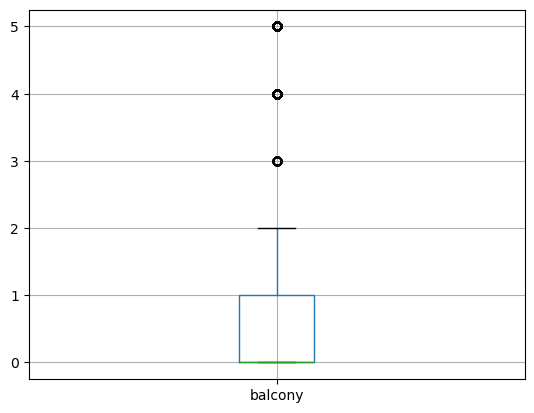

In [45]:
data.loc[:,['balcony']].boxplot()
plt.show()

In [46]:
data


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,distance_to_nearest_airport,distance_to_downtown,num_of_parks_around_3000m,distance_to_nearest_park,num_of_ponds_around_3000m,distance_to_nearest_pond,days_exposition
0,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,True,False,False,25.0000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,3350000.0,40.40,2018-12-04,1,2.64,11,18.600000,1,True,False,False,11.0000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,5196000.0,56.00,2015-08-20,2,2.60,5,34.300000,4,True,False,False,8.3000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,64900000.0,159.00,2015-07-24,3,2.65,14,91.730769,9,True,False,False,27.8250,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,True,False,False,41.0000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,2017-03-21,3,3.70,5,73.300000,3,True,False,False,13.8300,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,3100000.0,59.00,2018-01-15,3,2.65,5,38.000000,4,True,False,False,8.5000,0,Тосно,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0
23696,2500000.0,56.70,2018-02-11,2,2.60,3,29.700000,1,True,False,False,9.9225,0,село Рождествено,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
23697,11475000.0,76.75,2017-03-28,2,3.00,17,44.278846,12,True,False,False,23.3000,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


## Pre processing

#### number of unique localities 

In [47]:
len(data['locality_name'].unique())

365

removing rows with missing names

In [48]:
idx_to_be_removed.extend(data['locality_name'].loc[data['locality_name'].isna()].index)


## Removing rows 

checking how may rows to remove

In [49]:
to_be_removed_count = len(pd.Series(idx_to_be_removed).unique())
to_be_removed_prc = np.round(float((to_be_removed_count * 100) / len(data)), decimals = 1)

print(f"Total records marked for deletion:{to_be_removed_count} ({to_be_removed_prc}%)")

Total records marked for deletion:829 (3.5%)


creating new dataframe with clean data while keeping original intact

In [50]:
data_cleaned = data.copy()
data_cleaned.drop(labels = idx_to_be_removed, axis =0, inplace = True)

In [51]:
data_cleaned.head(2)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,distance_to_nearest_airport,distance_to_downtown,num_of_parks_around_3000m,distance_to_nearest_park,num_of_ponds_around_3000m,distance_to_nearest_pond,days_exposition
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,3350000.0,40.4,2018-12-04,1,2.64,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0


In [52]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22870 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   last_price                   22870 non-null  float64       
 1   total_area                   22870 non-null  float64       
 2   first_day_exposition         22870 non-null  datetime64[ns]
 3   rooms                        22870 non-null  int64         
 4   ceiling_height               22870 non-null  float64       
 5   floors_total                 22870 non-null  Int64         
 6   living_area                  22870 non-null  float64       
 7   floor                        22870 non-null  int64         
 8   is_apartment                 22870 non-null  bool          
 9   is_studio                    22870 non-null  bool          
 10  is_open_plan                 22870 non-null  bool          
 11  kitchen_area                 22870 non-null  f

In [53]:
data_cleaned[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area','floor', 'floors_total']].apply (['count', 'min', 'max'])   
    

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,22870,22870.0,22870.0,19809.0,22870.0,22870.0,22870.0000,22870,22870
min,1,20.1,2.2,1.0,1000000.0,5.4,3.5175,1,1
max,8,297.5,4.5,1580.0,50000000.0,332.0,51.6250,27,29


## adding new coluns to dataset

#### price per square meter

In [55]:
data_cleaned['sqm_cost'] = data_cleaned['last_price']/data['total_area'] /1000
data_cleaned['sqm_cost'].describe()

count    22870.000000
mean        98.839766
std         46.047836
min         10.507246
25%         77.000000
50%         95.000000
75%        113.852569
max       1250.000000
Name: sqm_cost, dtype: float64

#### day,month and year the ad was published

In [56]:
data_cleaned['day'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.weekday
data_cleaned['month'] = data_cleaned['first_day_exposition'].dt.month
data_cleaned['year'] = data_cleaned['first_day_exposition'].dt.year


## Exploratory Analysis

#### total area

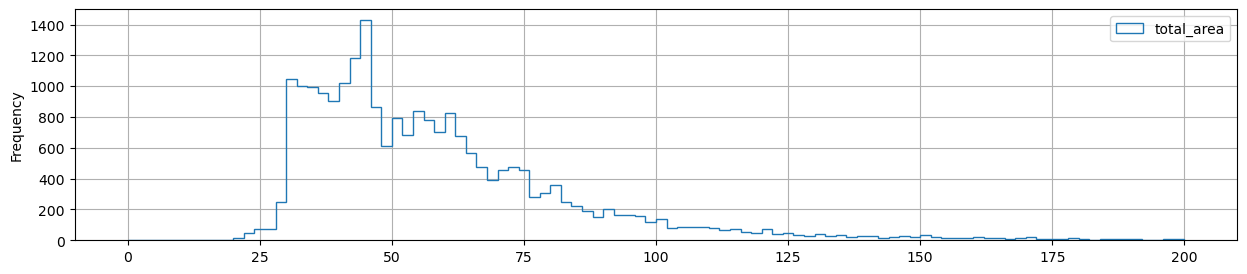

In [62]:
data_cleaned.plot(kind='hist',y='total_area',histtype='step',range=(0, 200),bins=100,label='total_area',
    grid=True,
    legend=True,
    figsize = (15,3))
plt.show()

most apartment on the market are from 25 to 40 sq meters

#### ratio of total area to living area

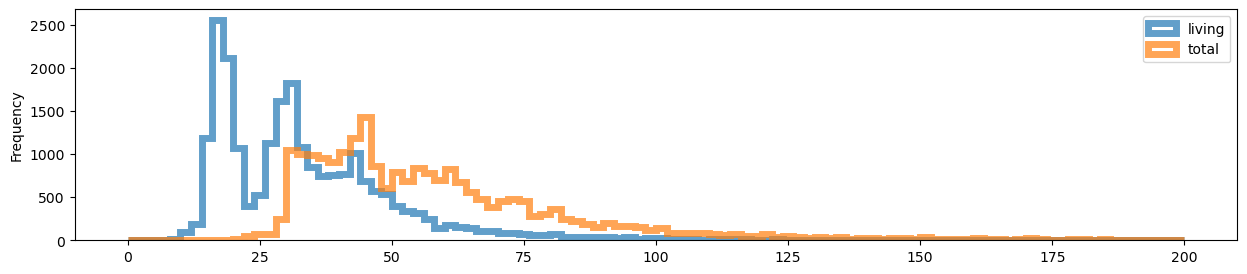

In [73]:
ax=data_cleaned.plot(kind='hist',y='living_area',histtype='step',range=(0,200),bins=100,linewidth=5,alpha=0.7,label='living',figsize = (15,3))
data_cleaned.plot(ax=ax,kind='hist',y='total_area',histtype='step',range=(0,200),bins=100,linewidth=5,alpha=0.7,label='total',figsize = (15,3))
plt.show()

#### kitchen area

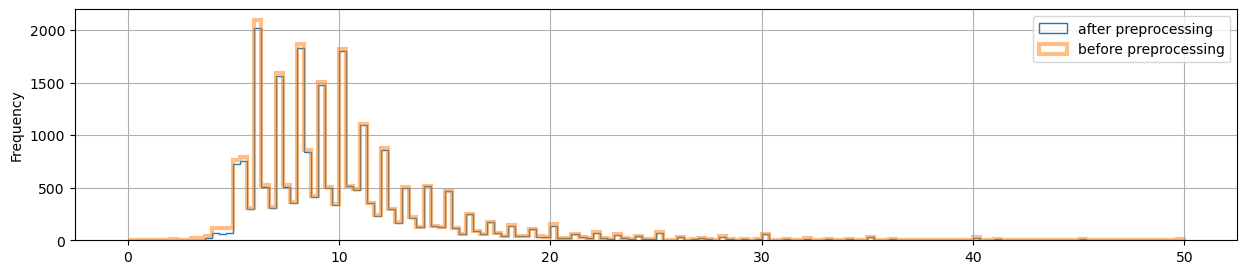

In [77]:
# after pre-processing
ax = data_cleaned.plot(kind='hist',y='kitchen_area',histtype='step',range=(0, 50),bins=150,linewidth=1,alpha=1,label='after preprocessing',figsize = (15,3))

# before pre-processing
data.plot(kind='hist',y='kitchen_area',histtype='step',range=(0, 50),bins=150,linewidth=3,alpha=0.5,label='before preprocessing',ax=ax,grid=True,legend=True,figsize = (15,3))
plt.show()

The graph shows that the results of preprocessing did not affect the shape of the distribution of
the parameter under study. This means that the basic statistical parameters of the population
remained unchanged. 

#### relationship between last price and total area

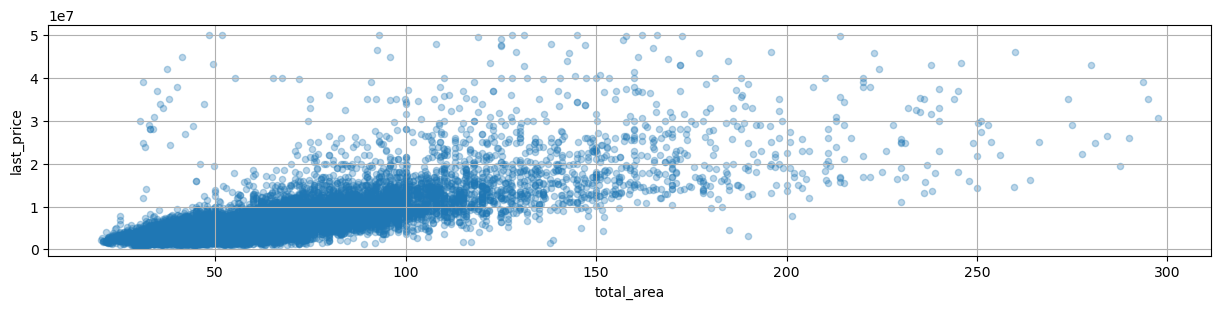

In [80]:
data_cleaned.plot(x='total_area',y='last_price',kind='scatter',grid=True,alpha=0.3,figsize = (15,3))
plt.show()

The price of a property is closely related to its total area, however, as
these parameters increase, the relationship between them weakens significantly.

#### distribution of number of rooms

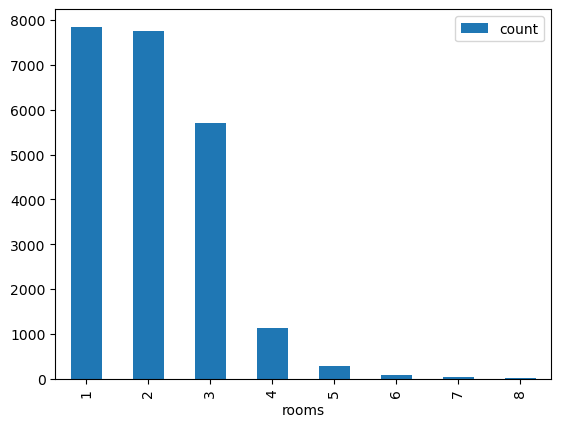

In [86]:
data_cleaned['count'] = 1
data_cleaned.pivot_table(index='rooms', values='count', aggfunc='count').plot(kind='bar')
plt.show()

#### floors

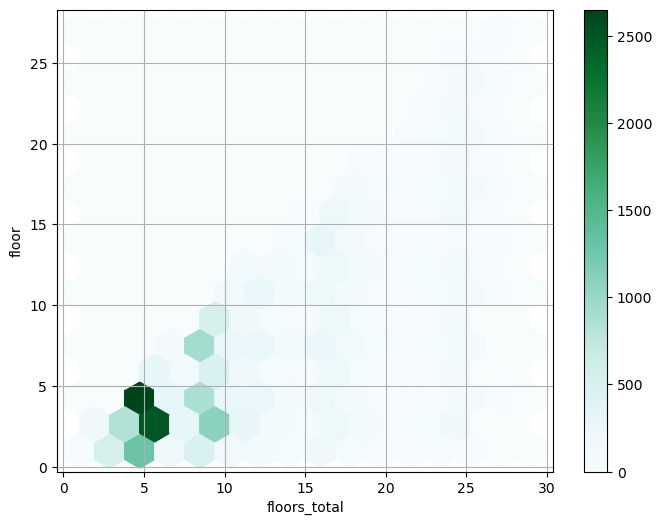

In [89]:
data_cleaned.plot(x='floors_total', y='floor', kind='hexbin',gridsize=15, figsize=(8,6),
grid=True) 
plt.show()

Most often offered for sale 1st and 2nd floors

#### Floors total

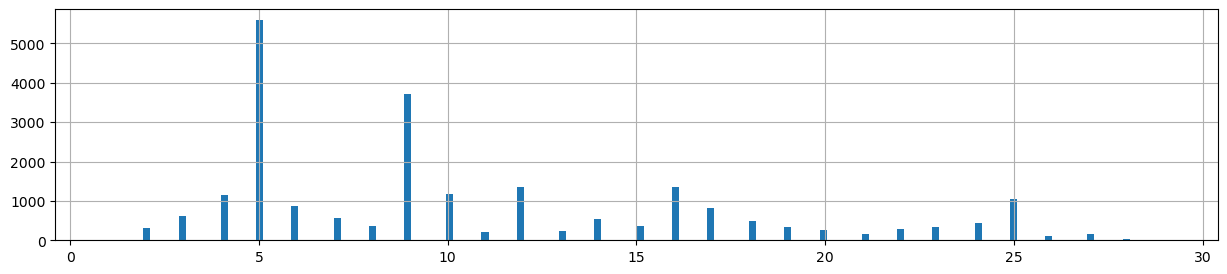

In [90]:
data_cleaned['floors_total'].hist(bins=150, figsize=(15,3))
plt.show()

the market is dominated by series of houses with 5 and 9 storey buildings

#### day of week

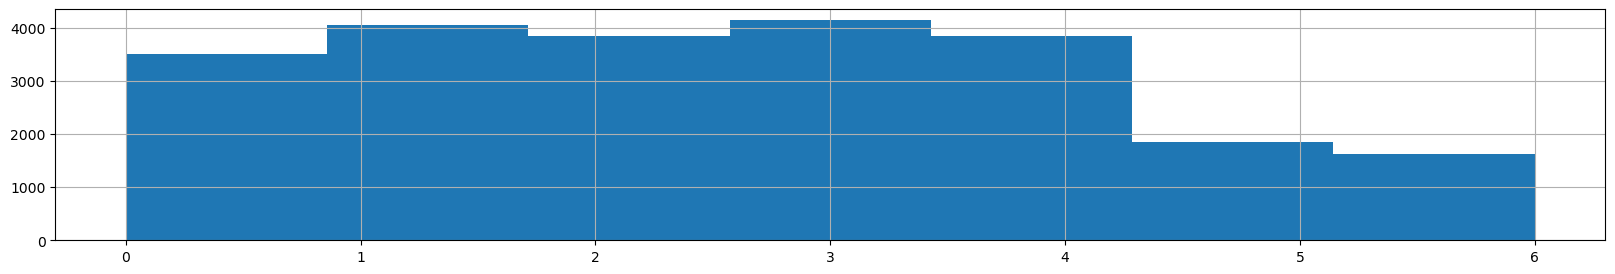

In [91]:
data_cleaned['day'].hist(bins=7,figsize=(20,3))
plt.show()

most ads are posted on weekdays

#### month

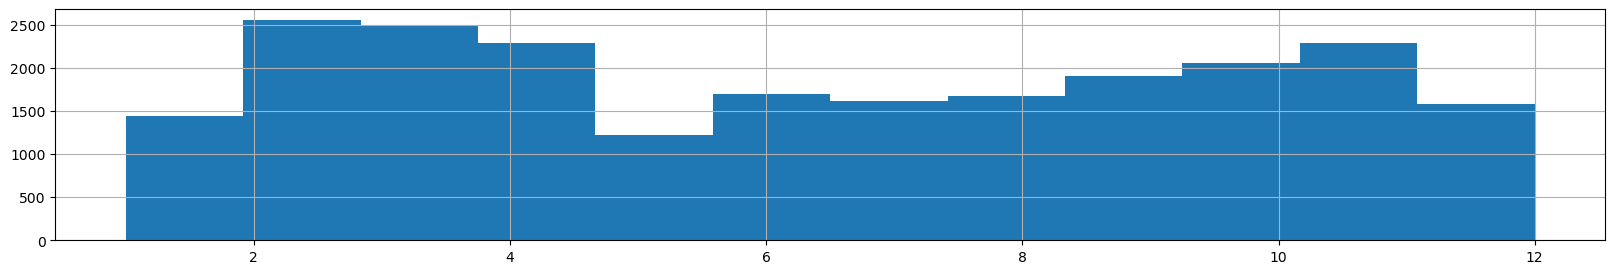

In [95]:
data_cleaned['month'].hist(bins=12,figsize=(20,3))
plt.show()

there is a decline in ads during the summer

#### real estate sales speed

To analyze the speed of apartment sales, we will create an auxiliary dataframe, which will
contain only those real estate objects that have information in the 'days_exposition' column


In [96]:
data_sold = data[~data['days_exposition'].isna()]

In [97]:
data_sold['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

the duration of the sale is normal is a period of up to six months from six months to a year and a half is long, but within normal limits. There are
cases when a property has been on sale for more than a year and a half.

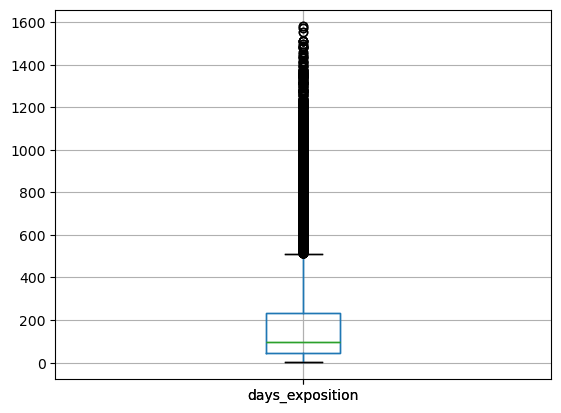

In [99]:
data_sold.loc[:,['days_exposition']].boxplot()
plt.show()

#### Factors that most influenced the total cost 

To analyze the influence of factors on the price of a real estate property, we will construct a matrix of
scatterplots for each of the factors in order to visually assess the presence of a relationship between the
price and each of the factors


In [101]:
list=(['last_price','total_area','living_area','kitchen_area','rooms'])

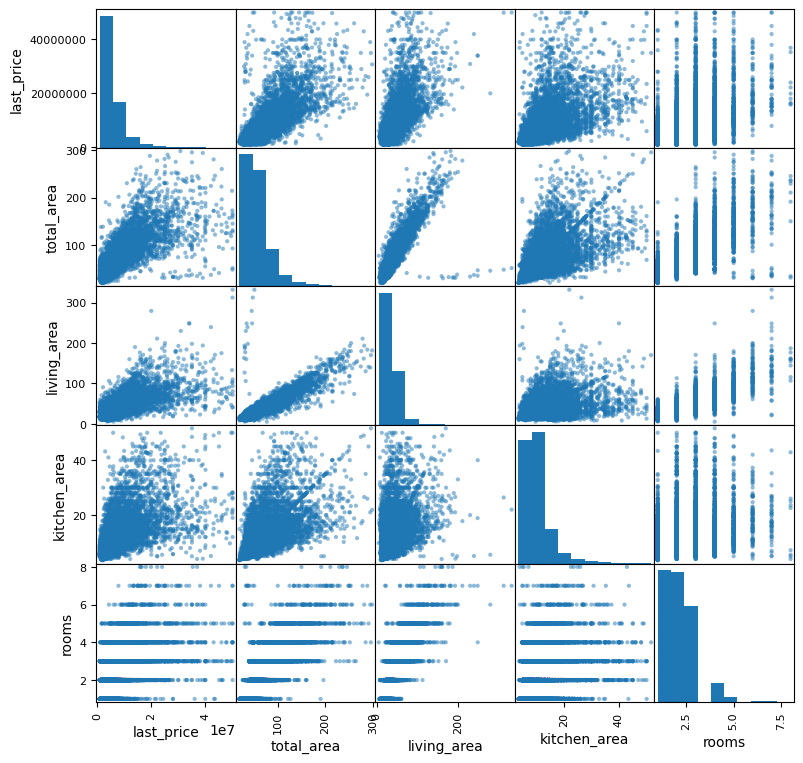

In [105]:
pd.plotting.scatter_matrix(data_cleaned.loc[:,list], figsize=(9, 9))
plt.show()

In [106]:
data_cleaned.loc[:,list].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.759665,0.686480,0.604533,0.500796
total_area,0.759665,1.000000,0.901232,0.610517,0.779838
living_area,0.686480,0.901232,1.000000,0.409502,0.854252
kitchen_area,0.604533,0.610517,0.409502,1.000000,0.270240
rooms,0.500796,0.779838,0.854252,0.270240,1.000000


The price of a property is significantly influenced by its total area. The influence that other
characteristics of the property have (living area, kitchen area, number of rooms) is a
consequence of the fact that there is a direct correlation between these factors and the
total area, and therefore they also show a correlation with the price.
